In [49]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the paths to your dataset folders
train_dir = r'brain_tumor_mri_dataset_binary\Train'
train_tumor_folder = r'brain_tumor_mri_dataset_binary\Train\tumor'
train_no_tumor_folder = r'brain_tumor_mri_dataset_binary\Train\no_tumor'
train_tumor_augmented_folder = r'brain_tumor_mri_dataset_binary\Augmented\Train\tumor_augmented'
train_no_tumor_augmented_folder = r'brain_tumor_mri_dataset_binary\Augmented\Train\no_tumor_augmented'

test_dir = r'brain_tumor_mri_dataset_binary\Test'
test_tumor_folder = r'brain_tumor_mri_dataset_binary\Test\tumor'
test_no_tumor_folder = r'brain_tumor_mri_dataset_binary\Test\no_tumor'
test_tumor_augmented_folder = r'brain_tumor_mri_dataset_binary\Augmented\Test\tumor_augmented'
test_no_tumor_augmented_folder = r'brain_tumor_mri_dataset_binary\Augmented\Test\no_tumor_augmented'

# Define the desired number of augmented images
desired_train_count = 5000
desired_test_count = 1000

In [17]:
folder_images = os.listdir(test_no_tumor_folder)
image_count = len(folder_images)
print(f"The number of images in the folder at: {test_no_tumor_folder} is {image_count}\n")
augmentation_factor = desired_test_count - image_count
print(f"the number of images to be added are: {augmentation_factor}\n")

The number of images in the folder at: brain_tumor_mri_dataset_binary\Test\no_tumor is 405

the number of images to be added are: 595



In [58]:
# Functions to apply data augmentation on an image

## flip the image horizontally
def flip_augmentation(image):
    img = image.copy()
    flipped_image = cv2.flip(img, 1)
    return flipped_image

# ## rotate the image 10 degrees clockwise
# def rotate_augmentation(image):
#     img = image.copy()
#     M = cv2.getRotationMatrix2D((img.shape[0]/2,image.shape[1]/2),-10,1) 
#     rotated_image = cv2.warpAffine(image,M,(img.shape[1],img.shape[0])) 
#     return rotated_image

## crop 95%
def crop_augmentation(image):
    height, width = image.shape[:2]
    crop_height = int(height * 0.95)
    crop_width = int(width * 0.95)
    start_x = int((width - crop_width) / 2)
    start_y = int((height - crop_height) / 2)
    cropped_image = image[start_y:start_y+crop_height, start_x:start_x+crop_width]
    return cropped_image

# Function to perform data augmentation on the folder
def save_augmented_folder(folder, output_folder, desired_count):
    folder_images = os.listdir(folder)
    image_count = len(folder_images)
    print(f"The number of images in the folder at: {folder} is {image_count}\n")
    augmentation_factor = desired_count - image_count
    print(f"the number of images to be added are: {augmentation_factor}\n")

    # Copy the original images to the output folder
    for image_name in tqdm(folder_images, desc='Copying Original Images to Augmented folder'):
        image_path = os.path.join(folder, image_name)
        img = cv2.imread(image_path)
        img1 = img.copy()
        output_path = os.path.join(output_folder, image_name)
        cv2.imwrite(output_path, img1)

    for i in tqdm(range(augmentation_factor), desc=f'Augmenting {folder}'):
        if i < len(folder_images):
            image_name = folder_images[i]  # Get the image name from the folder_images list
            image_path = os.path.join(folder, image_name)
            image = cv2.imread(image_path)  # Read the image

            augmented_image = flip_augmentation(image)
            output_path = os.path.join(output_folder, f'flipped_{i}_{image_name}')
            cv2.imwrite(output_path, augmented_image)
        else:
            image_name = folder_images[i%image_count]  # Get the image name from the folder_images list
            image_path = os.path.join(folder, image_name)
            image = cv2.imread(image_path)  # Read the image

            augmented_image = crop_augmentation(image)
            output_path = os.path.join(output_folder, f'cropped{i}_{image_name}')
            cv2.imwrite(output_path, augmented_image)

(512, 512, 3)
(486, 486, 3)


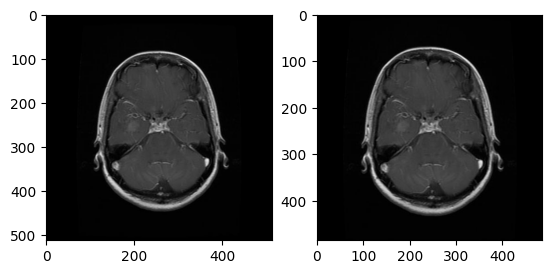

In [63]:
img1 = cv2.imread(r"C:\Project_IITR\Binary_Classification\brain_tumor_mri_dataset_binary\Test\tumor\Te-gl_0013.jpg")
print(img1.shape)
img2 = crop_augmentation(img1)
print(img2.shape)
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [52]:
save_augmented_folder(test_tumor_folder, test_tumor_augmented_folder, desired_test_count)

The number of images in the folder at: brain_tumor_mri_dataset_binary\Test\tumor is 906

the number of images to be added are: 94



Copying Original Images to Augmented folder: 100%|██████████| 906/906 [00:07<00:00, 116.47it/s]
Augmenting brain_tumor_mri_dataset_binary\Test\tumor: 100%|██████████| 94/94 [00:00<00:00, 107.06it/s]


In [64]:
save_augmented_folder(test_no_tumor_folder, test_no_tumor_augmented_folder, desired_test_count)

The number of images in the folder at: brain_tumor_mri_dataset_binary\Test\no_tumor is 405

the number of images to be added are: 595



Copying Original Images to Augmented folder: 100%|██████████| 405/405 [00:02<00:00, 180.96it/s]
Augmenting brain_tumor_mri_dataset_binary\Test\no_tumor: 100%|██████████| 595/595 [00:03<00:00, 194.17it/s]


In [65]:
save_augmented_folder(train_tumor_folder, train_tumor_augmented_folder, desired_train_count)

The number of images in the folder at: brain_tumor_mri_dataset_binary\Train\tumor is 4117

the number of images to be added are: 883



Copying Original Images to Augmented folder: 100%|██████████| 4117/4117 [00:53<00:00, 76.73it/s]
Augmenting brain_tumor_mri_dataset_binary\Train\tumor: 100%|██████████| 883/883 [00:08<00:00, 99.01it/s] 


In [66]:
save_augmented_folder(train_no_tumor_folder, train_no_tumor_augmented_folder, desired_train_count)

The number of images in the folder at: brain_tumor_mri_dataset_binary\Train\no_tumor is 1595

the number of images to be added are: 3405



Copying Original Images to Augmented folder: 100%|██████████| 1595/1595 [00:15<00:00, 100.37it/s]
Augmenting brain_tumor_mri_dataset_binary\Train\no_tumor: 100%|██████████| 3405/3405 [00:19<00:00, 176.37it/s]
